In [ ]:
install.packages(c("doParallel",'mlbench','lattice','plyr','caret','corrplot','e1071',
                 'AppliedPredictiveModeling','ggplot2','dplyr','pROC','sparseLDA','MLmetrics','MASS','mda'))
install.packages("kernlab")
library(kernlab)
library(mlbench)
library(lattice)
library(plyr)
library(caret)
library(corrplot)
library(e1071)
library(AppliedPredictiveModeling)
library(ggplot2)
library(dplyr)
library(pROC)
library(sparseLDA)
library(MLmetrics)
library(MASS)
library(mda)
library(doParallel)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘bitops’, ‘prodlim’, ‘gtools’, ‘caTools’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘plotrix’, ‘rpart.plot’, ‘lars’, ‘gplots’, ‘foreach’, ‘iterators’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘CORElearn’, ‘ellipse’, ‘elasticnet’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha


corrplot 0.95 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects

In [ ]:
data = read.csv('sample_data/data.csv')

'data.frame':	6819 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

Bankrupt. 
                                                      0 
ROA.C..before.interest.and.depreciation.before.interest 
                                                      0 
                 ROA.A..before.interest.and...after.tax 
                                                      0 
      ROA.B..before.interest.and.depreciation.after.tax 
                                                      0 
                                 Operating.Gross.Margin 
                                                      0 
                            Realized.Sales.Gross.Margin 
                                                      0 
                                  Operating.Profit.Rate 
                                                      0 
                              Pre.tax.net.Interest.Rate 
                                                      0 
                            After.tax.net.Interest.Rate 
                                                      0 
            Non.industry.income.and.expenditure.revenue 
                                                      0 
                   Continuous.interest.rate..after.tax. 
                                                      0 
                                 Operating.Expense.Rate 
                                                      0 
                  Research.and.development.expense.rate 
                                                      0 
                                         Cash.flow.rate 
                                                      0 
                    Interest.bearing.debt.interest.rate 
                                                      0 
                                           Tax.rate..A. 
                                                      0 
                                Net.Value.Per.Share..B. 
                                                      0 
                                Net.Value.Per.Share..A. 
                                                      0 
                                Net.Value.Per.Share..C. 
                                                      0 
                Persistent.EPS.in.the.Last.Four.Seasons 
                                                      0 
                                    Cash.Flow.Per.Share 
                                                      0 
                             Revenue.Per.Share..Yuan... 
                                                      0 
                    Operating.Profit.Per.Share..Yuan... 
                                                      0 
               Per.Share.Net.profit.before.tax..Yuan... 
                                                      0 
                Realized.Sales.Gross.Profit.Growth.Rate 
                                                      0 
                           Operating.Profit.Growth.Rate 
                                                      0 
                       After.tax.Net.Profit.Growth.Rate 
                                                      0 
                         Regular.Net.Profit.Growth.Rate 
                                                      0 
                      Continuous.Net.Profit.Growth.Rate 
                                                      0 
                                Total.Asset.Growth.Rate 
                                                      0 
                                  Net.Value.Growth.Rate 
                                                      0 
                   Total.Asset.Return.Growth.Rate.Ratio 
                                                      0 
                                    Cash.Reinvestment.. 
                                                      0 
                                          Current.Ratio 
                                                      0 
                                            Quick.Ratio 
                                                      0 
                                 Interest.Expense.Ratio 

[1] FALSE

[1] 0

[1] "Current.Liability.to.Current.Assets"               
[2] "Interest.Coverage.Ratio..Interest.expense.to.EBIT."

Created from 6819 samples and 91 variables

Pre-processing:
  - Box-Cox transformation (91)
  - ignored (0)

Lambda estimates for Box-Cox transformation:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.0000 -2.0000 -1.8000 -0.4791  2.0000  2.0000 


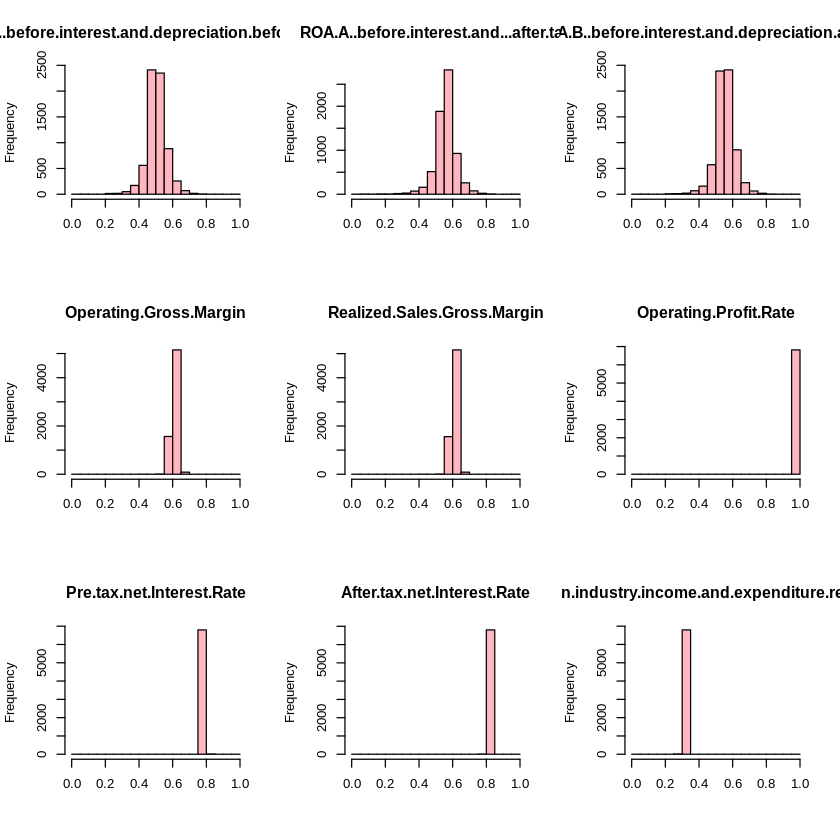

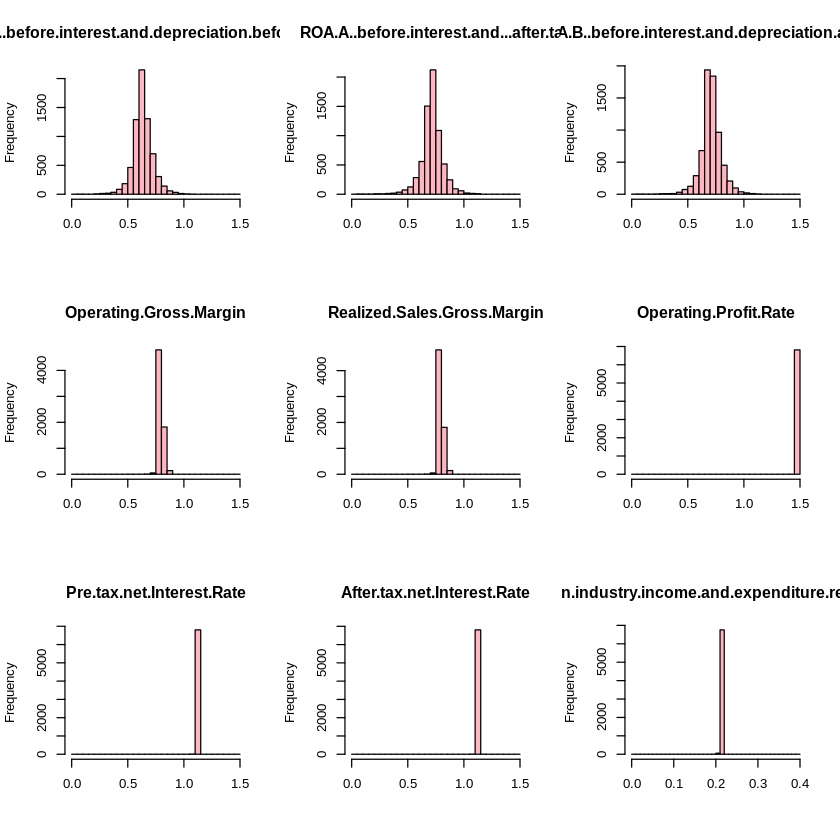

In [ ]:

attach(data)
str(data)

############################
# General data preprocessing
###########################
# check missing values
colSums(is.na(data))
anyNA(data)
sum(is.na(data))
# convert bankrupt to levels/factor
data$Bankrupt.=ifelse(data$Bankrupt.== 1, 'yes', 'no')
data$Bankrupt. = as.factor(data$Bankrupt.)
data$Liability.Assets.Flag = as.integer(Liability.Assets.Flag)
data$Net.Income.Flag = as.integer(Net.Income.Flag)
# check near zero variance predictors
preds_rmv = nearZeroVar(subset(data,select = -Bankrupt.))
colnames(data)[preds_rmv]
data=data[,-preds_rmv]
data=subset(data,select = -Net.Income.Flag)
# check distributions and apply box-cox transformation
data_nums = subset(data,select=-c(Liability.Assets.Flag,Bankrupt.))
data_cat = subset(data,select= c(Liability.Assets.Flag,Bankrupt.))
#ditribution for countinous variables
par(mfrow = c(3,3))
for (i in 1:9) {
  hist(data_nums[, i],main = colnames(data_nums)[i],
       breaks=30,xlab = '', col = "lightpink", border = "black")
}
# Reset the plot layout
par(mfrow = c(1, 1))
# apply box cox
# Add constants before box cox transformation
add_constant=function(col){
  col = col + abs(min(col)) + 1
  return(col)
}
data_pre_boxcox = as.data.frame(lapply(data_nums, add_constant))
data_pre = preProcess(data_pre_boxcox, method = c("BoxCox"))
#check lambdas
data_pre
# Apply
data_boxcox_nums_trans = predict(data_pre, data_pre_boxcox)
# check distributions after transformation
par(mfrow = c(3,3))
for (i in 1:9) {
  hist(data_boxcox_nums_trans[, i],main = colnames(data_boxcox_nums_trans)[i],
       breaks=30,xlab = '', col = "lightpink", border = "black")
}
# Reset the plot layout
par(mfrow = c(1, 1))
# final dataset after general preprocess
data_fin = cbind(data_boxcox_nums_trans,data_cat)
detach(data)
attach(data_fin)

In [ ]:
set.seed(100)
ctrl = trainControl(method = "CV",
                    number = 5,
                    summaryFunction = defaultSummary,
                    classProbs = TRUE,
                    savePredictions = TRUE)

In [ ]:
# remove highly correlated predictors
predictors = subset(data_fin,select=-Bankrupt.)
correlations = cor(predictors)
highCorr = findCorrelation(correlations, cutoff = .75)
length(highCorr)
predictors_corr_filter = predictors[,-highCorr]
# Data splitting
trainingRows = createDataPartition(Bankrupt., p = .80, list= FALSE)

# Subset the data into objects for training using
# integer sub-setting
trainPredictors = predictors_corr_filter[trainingRows, ]
trainClasses = Bankrupt.[trainingRows]

# Do the same for the test set using negative integers.
testPredictors =predictors_corr_filter[-trainingRows, ]
testClasses = Bankrupt.[-trainingRows]

[1] 28

Model Averaged Neural Network 

5456 samples
  64 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (64), scaled (64) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4365, 4365, 4364, 4365, 4365 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.9677421  0.00000000
  1     1e-04  0.9646262  0.21033189
  1     1e-03  0.9635274  0.09290182
  1     1e-02  0.9638949  0.23701730
  1     1e-01  0.9657277  0.31540106
  3     0e+00  0.9677421  0.00000000
  3     1e-04  0.9668267  0.34696389
  3     1e-03  0.9673759  0.34011267
  3     1e-02  0.9692083  0.40394175
  3     1e-01  0.9684752  0.35068611
  5     0e+00  0.9677421  0.00000000
  5     1e-04  0.9670096  0.33830788
  5     1e-03  0.9657266  0.32696708
  5     1e-02  0.9649925  0.31969733
  5     1e-01  0.9677422  0.33658534
  7     0e+00  0.9677421  0.00000000
  7     1e-04  0.9684757  0.35768900
  7     1e-03  0.9642594  0.28729723
  7     1e-02  0.9653598  

Accuracy     Kappa 
0.9647836 0.3339170

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1302   31
       yes   17   13
                                          
               Accuracy : 0.9648          
                 95% CI : (0.9536, 0.9739)
    No Information Rate : 0.9677          
    P-Value [Acc > NIR] : 0.7587          
                                          
                  Kappa : 0.3339          
                                          
 Mcnemar's Test P-Value : 0.0606          
                                          
            Sensitivity : 0.9871          
            Specificity : 0.2955          
         Pos Pred Value : 0.9767          
         Neg Pred Value : 0.4333          
             Prevalence : 0.9677          
         Detection Rate : 0.9552          
   Detection Prevalence : 0.9780          
      Balanced Accuracy : 0.6413          
                                          
       'Positive' Class : no              
                        

[1] "Execution time: 40.1687383532524"


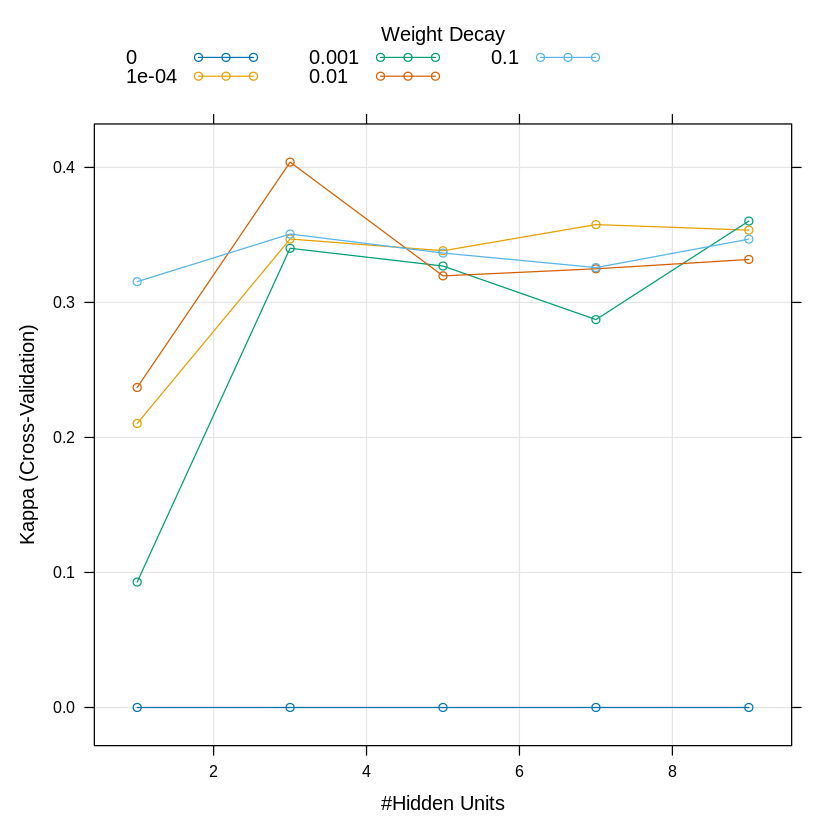

In [ ]:
####################################
# Neural Networks
####################################
# Record the start time
start_time = Sys.time()
# Detect the number of cores available
num_cores = detectCores()
cl = makeCluster(num_cores)
registerDoParallel(cl)
# model building
nnet_fit = train(trainPredictors, trainClasses,
                 method = "avNNet",
                 tuneLength = 5,
                 preProc = c("center", "scale"),
                 trace = FALSE,
                 metric = "Kappa",
                 MaxNWts = 10 * (ncol(trainPredictors) + 1) + 10 + 1,
                 trControl = ctrl,
                 maxit = 500)
nnet_fit
plot(nnet_fit)

# test
nnet_pred = predict(nnet_fit, newdata = testPredictors)
## perforamnce values
postResample(pred = nnet_pred, obs = testClasses)

confusionMatrix(data = nnet_pred,
                reference = testClasses)
# Record the end time
end_time = Sys.time()

# Calculate the difference
execution_time = end_time - start_time

# Print the execution time
print(paste("Execution time:", execution_time))


Model Averaged Neural Network 

5456 samples
  64 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (64), scaled (64), spatial sign transformation (64) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4365, 4365, 4364, 4365, 4365 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.9677421  0.0000000
  1     1e-04  0.9670096  0.3288346
  1     1e-03  0.9675596  0.3337420
  1     1e-02  0.9666432  0.3210997
  1     1e-01  0.9688420  0.2604679
  3     0e+00  0.9677421  0.0000000
  3     1e-04  0.9681090  0.3756510
  3     1e-03  0.9677424  0.3493777
  3     1e-02  0.9666422  0.3468161
  3     1e-01  0.9701249  0.3126821
  5     0e+00  0.9677421  0.0000000
  5     1e-04  0.9668258  0.3499694
  5     1e-03  0.9664597  0.3639188
  5     1e-02  0.9651763  0.3017234
  5     1e-01  0.9693918  0.3068453
  7     0e+00  0.9677421  0.0000000
  7     1e-04  0.9682919  0.3601465
  7     1e-03  0.9653598  0.3333819
  7     1e-

Accuracy     Kappa 
0.9691856 0.4459457

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1303   26
       yes   16   18
                                          
               Accuracy : 0.9692          
                 95% CI : (0.9586, 0.9777)
    No Information Rate : 0.9677          
    P-Value [Acc > NIR] : 0.4180          
                                          
                  Kappa : 0.4459          
                                          
 Mcnemar's Test P-Value : 0.1649          
                                          
            Sensitivity : 0.9879          
            Specificity : 0.4091          
         Pos Pred Value : 0.9804          
         Neg Pred Value : 0.5294          
             Prevalence : 0.9677          
         Detection Rate : 0.9560          
   Detection Prevalence : 0.9751          
      Balanced Accuracy : 0.6985          
                                          
       'Positive' Class : no              
                        

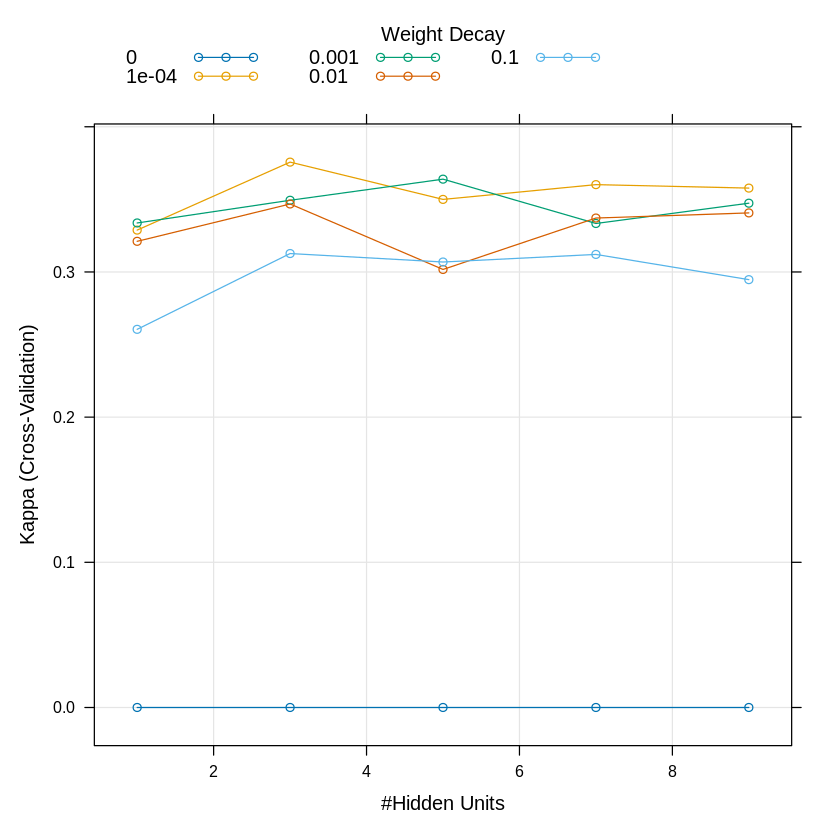

[1] "Execution time: 28.2228276689847"


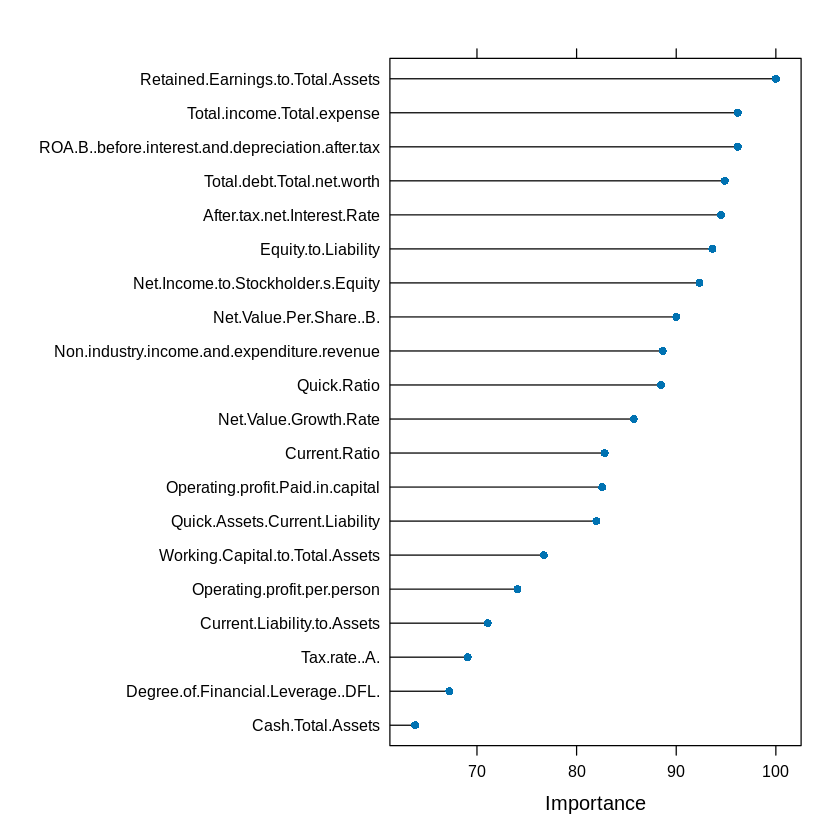

In [ ]:
####################################
# Neural Networks With Spatial Sign
####################################
# Record the start time
start_time = Sys.time()
# Detect the number of cores available
num_cores = detectCores()
cl = makeCluster(num_cores)
registerDoParallel(cl)
# model building
nnet_fit = train(trainPredictors, trainClasses,
                 method = "avNNet",
                 tuneLength = 5,
                 preProc = c("center", "scale","spatialSign"),
                 trace = FALSE,
                 metric = "Kappa",
                 MaxNWts = 10 * (ncol(trainPredictors) + 1) + 10 + 1,
                 trControl = ctrl,
                 maxit = 500)
nnet_fit
plot(nnet_fit)

# test
nnet_pred = predict(nnet_fit, newdata = testPredictors)
## perforamnce values
postResample(pred = nnet_pred, obs = testClasses)

confusionMatrix(data = nnet_pred,
                reference = testClasses)

plot(varImp(nnet_fit) , top = 20)
# Record the end time
end_time = Sys.time()

# Calculate the difference
execution_time = end_time - start_time

# Print the execution time
print(paste("Execution time:", execution_time))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Formula’, ‘plotmo’


Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix



Flexible Discriminant Analysis 

5456 samples
  64 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4365, 4364, 4365, 4365, 4365 
Resampling results across tuning parameters:

  nprune  Accuracy   Kappa    
   2      0.9534463  0.2039241
   3      0.9556454  0.3418645
   4      0.9591263  0.3690048
   5      0.9576604  0.3524267
   6      0.9582105  0.3679668
   7      0.9602269  0.3814818
   8      0.9591268  0.3714199
  10      0.9580269  0.3771330
  11      0.9587602  0.3889419
  12      0.9596766  0.4040088
  13      0.9591263  0.3935167
  14      0.9600430  0.3951094
  15      0.9598596  0.3938904
  16      0.9598597  0.4002744
  18      0.9591265  0.3929867

Tuning parameter 'degree' was held constant at a value of 1
Kappa was used to select the optimal model using the largest value.
The final values used for the model were degree = 1 and nprune = 12.

Accuracy     Kappa 
0.9611152 0.3974912

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1291   25
       yes   28   19
                                          
               Accuracy : 0.9611          
                 95% CI : (0.9494, 0.9707)
    No Information Rate : 0.9677          
    P-Value [Acc > NIR] : 0.9240          
                                          
                  Kappa : 0.3975          
                                          
 Mcnemar's Test P-Value : 0.7835          
                                          
            Sensitivity : 0.9788          
            Specificity : 0.4318          
         Pos Pred Value : 0.9810          
         Neg Pred Value : 0.4043          
             Prevalence : 0.9677          
         Detection Rate : 0.9472          
   Detection Prevalence : 0.9655          
      Balanced Accuracy : 0.7053          
                                          
       'Positive' Class : no              
                        

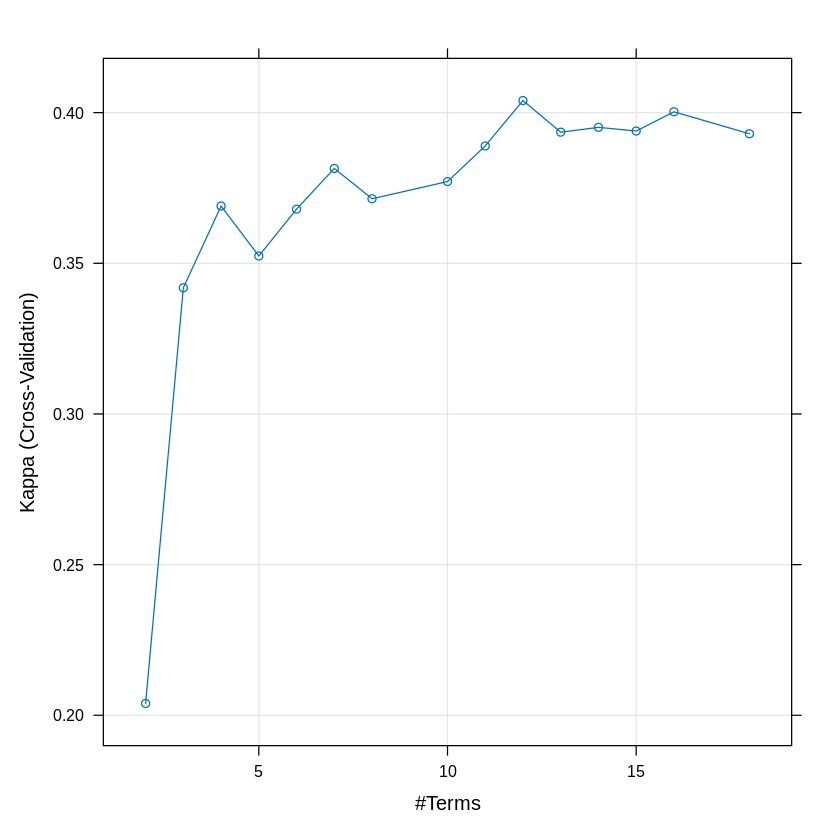

In [ ]:
####################################
# Flexible Discriminant Analysis (FDA)
####################################
install.packages("earth")
library('earth')
marsGrid = expand.grid(.degree = 1:2, .nprune = 2:38)
## train model
fda_fit = train(trainPredictors, trainClasses,
                 method = "fda",
                 tuneLength = 15,
                 # tuneGrid = marsGrid,
                 metric = 'Kappa',
                 trControl = ctrl)

fda_fit

plot(fda_fit)
# plot(fdaTuned,main="FDA, degree = 1 and nprune = 6")
# test
fda_pred = predict(fda_fit, newdata = testPredictors)
## The function 'postResample' can be used to get the test set
## perforamnce values
postResample(pred = fda_pred, obs = testClasses)

confusionMatrix(data = fda_pred,
                reference = testClasses)

Support Vector Machines with Radial Basis Function Kernel 

5456 samples
  92 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (92), scaled (92) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4365, 4365, 4365, 4364, 4365 
Resampling results across tuning parameters:

  C        Accuracy   Kappa     
   0.0625  0.9670085  0.11508109
   0.1250  0.9666418  0.11310175
   0.2500  0.9666418  0.12081398
   0.5000  0.9668253  0.13151326
   1.0000  0.9666418  0.12259780
   2.0000  0.9668253  0.11500629
   4.0000  0.9655428  0.11663879
   8.0000  0.9670085  0.13906551
  16.0000  0.9681082  0.15149277
  32.0000  0.9671921  0.12528159
  64.0000  0.9670090  0.08372593

Tuning parameter 'sigma' was held constant at a value of 0.003809413
Kappa was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.003809413 and C = 16.

Accuracy      Kappa 
0.96478357 0.06766232

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1313   42
       yes    6    2
                                          
               Accuracy : 0.9648          
                 95% CI : (0.9536, 0.9739)
    No Information Rate : 0.9677          
    P-Value [Acc > NIR] : 0.7587          
                                          
                  Kappa : 0.0677          
                                          
 Mcnemar's Test P-Value : 4.376e-07       
                                          
            Sensitivity : 0.99545         
            Specificity : 0.04545         
         Pos Pred Value : 0.96900         
         Neg Pred Value : 0.25000         
             Prevalence : 0.96772         
         Detection Rate : 0.96332         
   Detection Prevalence : 0.99413         
      Balanced Accuracy : 0.52045         
                                          
       'Positive' Class : no              
                        

[1] "Execution time: 1.67367353439331"


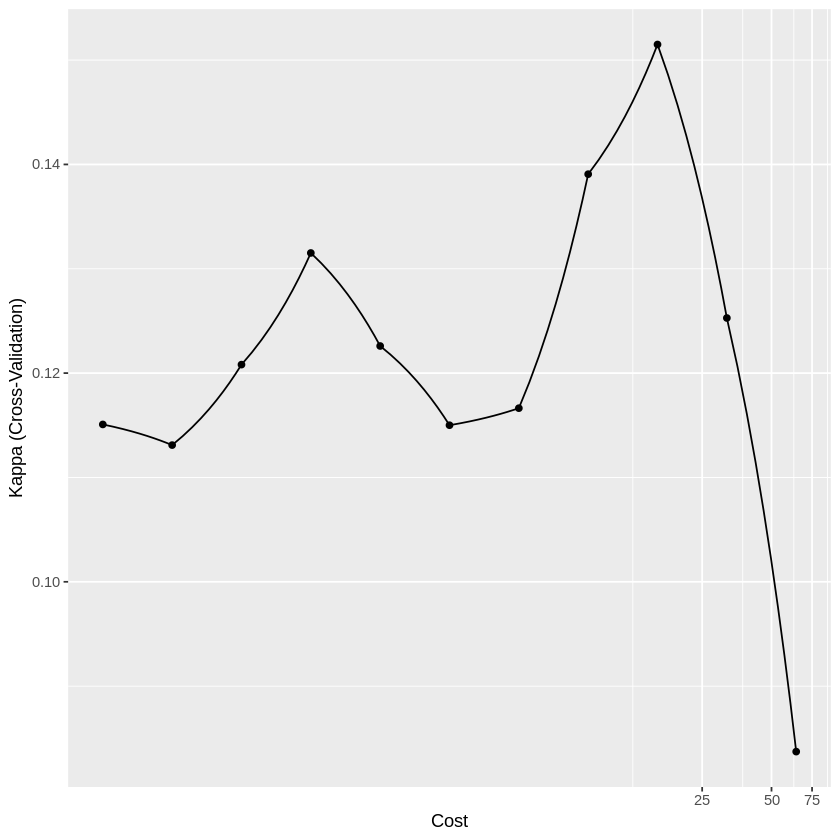

In [ ]:
###############################
# Support Vector Machine (SVM)
###############################

set.seed(100)

# Data splitting
trainingRows = createDataPartition(Bankrupt., p = .80, list= FALSE)
# Subset the data into objects for training using
# integer sub-setting
trainPredictors = predictors[trainingRows, ]
trainClasses = Bankrupt.[trainingRows]
# Do the same for the test set using negative integers.
testPredictors =predictors[-trainingRows, ]
testClasses = Bankrupt.[-trainingRows]
sigmaRangeReduced = sigest(as.matrix(predictors))
svmRGridReduced = expand.grid(.sigma = sigmaRangeReduced[1],
                                 .C = 2^(seq(-4, 6)))
# Record the start time
start_time = Sys.time()
svm_fit = train(trainPredictors, trainClasses,
                   method = "svmRadial",
                   preProc = c("center", "scale"),
                   tuneGrid = svmRGridReduced,
                   metric = "Kappa",
                   trControl = ctrl)

svm_fit
# use log2 plot  for bette visualization
ggplot(svm_fit)+coord_trans(x='log2')
# test
svm_pred = predict(svm_fit, newdata = testPredictors)
## perforamnce values
postResample(pred = svm_pred, obs = testClasses)

confusionMatrix(data = svm_pred,
                reference = testClasses)
# Record the end time
end_time = Sys.time()
# Calculate the difference
execution_time = end_time - start_time
# Print the execution time
print(paste("Execution time:", execution_time))